<a href="https://colab.research.google.com/github/tsbslteisrhy/Bigdata/blob/master/tf10_auto_encoder_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2020/08/25
이름 : 유효진
내용 : 딥러닝 오토인코더(AutoEncoder) 개념 실습하기
"""
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

tf.__version__

In [ ]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

#x_train[0] : 28 * 28 픽셀데이터 출력
#y_train[0] : x_train의 정답 출력

In [ ]:
# 데이터 전처리
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

x_train.shape

In [ ]:
# 오토인코더 모델 구성
inputs = Input(shape=(784,))
hidden = Dense(32, activation='relu')(inputs)
outputs = Dense(784, activation='sigmoid')(hidden)

auto_encoder = Model(inputs, outputs)
auto_encoder.summary()

In [ ]:
# 모델 설정/학습하기
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')

#비지도학습 (문제-정답이 아니라 문제-문제: 원본이미지에 대해 원본이미지가 출력될 수 있도록 가중치 조절)
auto_encoder.fit(x_train,
                 x_train,
                 epochs=20,
                 batch_size=256)

In [ ]:
# 예측하기
result = auto_encoder.predict(x_test)
result

array([[1.54351270e-08, 2.74800449e-09, 9.42302059e-09, ...,
        3.77806515e-08, 2.92507374e-09, 1.38887337e-08],
       [1.93207828e-11, 2.73680280e-11, 9.33786520e-11, ...,
        2.88214353e-12, 1.92901459e-11, 7.55411914e-11],
       [3.50708569e-06, 2.95573045e-06, 2.45498290e-06, ...,
        7.52763356e-07, 9.20211278e-07, 3.18307957e-06],
       ...,
       [6.85928419e-13, 5.58119496e-14, 4.49477451e-13, ...,
        5.65941933e-13, 2.24856537e-13, 6.85141234e-13],
       [1.61366840e-11, 2.81150428e-12, 4.86694192e-12, ...,
        1.86310429e-11, 7.39513450e-11, 3.45635812e-11],
       [1.52239862e-17, 9.96784650e-18, 8.06214117e-19, ...,
        5.70280276e-18, 1.09617406e-18, 1.02456166e-16]], dtype=float32)

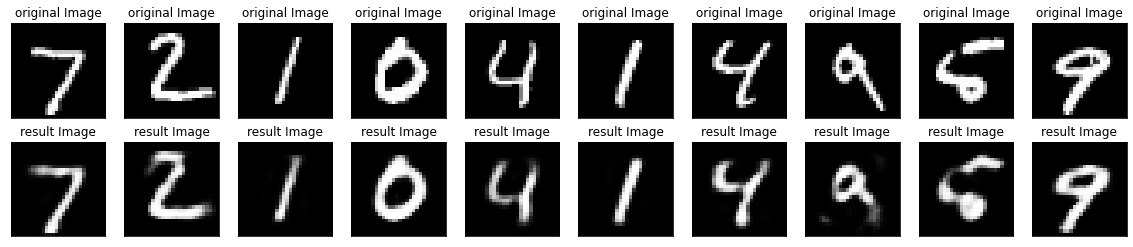

In [ ]:
# 예측값 이미지 출력
plt.figure(figsize=(20, 4))

for i in range(10):
  # original image
  ax = plt.subplot(2, 10, i+1)
  ax.set_title('original Image')
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # result image
  ax = plt.subplot(2, 10, i+11)
  ax.set_title('result Image')
  plt.imshow(result[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)